In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    confusion_matrix, precision_recall_curve
)

# Modèles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Gestion du déséquilibre
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier

# XGBoost
from xgboost import XGBClassifier

# Configuration graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✓ Bibliothèques importées")

✓ Bibliothèques importées


In [3]:
df = pd.read_csv('data_complete_cleaned.csv')


In [5]:
df.head(10)

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Mois,Date
0,A013010004908126703060931,78643044,0,20.00,2017-02-01 07:32:14,1,0,0,0,551,...,0,1,4.000000,4.0,4.0,20.00,0.00,27134,2017-02,2017-02-01
1,A013011306908024927155000,78643045,0,20.00,2017-02-01 07:43:37,1,0,0,0,551,...,1,2,1.797685,4.0,4.0,28.61,8.61,27817,2017-02,2017-02-01
2,A013010002908283134592527,78643046,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,...,0,1,4.000000,4.0,4.0,57.64,0.00,28058,2017-02,2017-02-01
3,A011010002908105209831316,78643047,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,...,0,1,4.000000,4.0,4.0,54.29,0.00,28128,2017-02,2017-02-01
4,A013010041908000125652029,78643048,0,26.90,2017-02-01 08:13:27,1,0,0,0,549,...,1,1,1.997106,4.0,4.0,59.15,32.25,29607,2017-02,2017-02-01
5,A044014706908021215591000,78643049,0,42.51,2017-02-01 08:13:53,1,0,0,0,523,...,0,1,4.000000,4.0,4.0,42.51,0.00,29633,2017-02,2017-02-01
6,A059010041908012913210426,78643050,0,50.84,2017-02-01 08:18:24,1,0,0,0,551,...,0,1,4.000000,4.0,4.0,50.84,0.00,29904,2017-02,2017-02-01
7,A013000077908491210714030,78643051,0,87.14,2017-02-01 08:19:28,1,0,0,0,547,...,0,1,4.000000,4.0,4.0,87.14,0.00,29968,2017-02,2017-02-01
8,A055054707908007521756697,78643052,0,40.00,2017-02-01 08:20:13,1,0,0,0,548,...,0,1,4.000000,4.0,4.0,40.00,0.00,30013,2017-02,2017-02-01
9,A013010041908001298460129,78643053,0,90.59,2017-02-01 08:24:09,1,0,0,0,538,...,0,1,4.000000,4.0,4.0,90.59,0.00,30249,2017-02,2017-02-01


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646773 entries, 0 to 4646772
Data columns (total 25 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ZIBZIN                    object 
 1   IDAvisAutorisationCheque  int64  
 2   FlagImpaye                int64  
 3   Montant                   float64
 4   DateTransaction           object 
 5   CodeDecision              int64  
 6   VerifianceCPT1            int64  
 7   VerifianceCPT2            int64  
 8   VerifianceCPT3            int64  
 9   D2CB                      int64  
 10  ScoringFP1                float64
 11  ScoringFP2                float64
 12  ScoringFP3                float64
 13  TauxImpNb_RB              float64
 14  TauxImpNB_CPM             float64
 15  EcartNumCheq              int64  
 16  NbrMagasin3J              int64  
 17  DiffDateTr1               float64
 18  DiffDateTr2               float64
 19  DiffDateTr3               float64
 20  CA3TRetMtt              

In [7]:
df.describe()

,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
count,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,...,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06
mean,8.088216e+07,6.455017e-03,6.014214e+01,2.516043e-01,2.295272e-01,2.452963e-01,2.716444e-01,3.139046e+02,2.217686e+00,2.033179e+00,...,3.912727e+01,3.850640e+01,8.480311e+03,1.036989e+00,3.873620e+00,4.166527e+00,4.199614e+00,6.730030e+01,7.158162e+00,5.248595e+04
std,1.781519e+06,8.008340e-02,1.019927e+02,4.475876e-01,4.422162e-01,4.965438e-01,5.812737e-01,2.207225e+02,2.709370e+01,9.715521e+00,...,6.011574e+01,1.673441e+01,1.982303e+05,1.920397e-01,1.059257e+00,5.171843e-01,4.242342e-01,1.114365e+02,3.860036e+01,1.187262e+04
min,7.864304e+07,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-6.446148e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.703704e-04,7.754630e-04,1.000000e-02,0.000000e+00,1.822500e+04
25%,7.946082e+07,0.000000e+00,2.598000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.900000e+01,5.631127e-03,-1.481721e+00,...,2.223457e+01,2.875694e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.940000e+01,0.000000e+00,4.148500e+04
50%,8.029597e+07,0.000000e+00,4.412000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.870000e+02,1.096892e-02,1.636853e-01,...,3.433578e+01,3.681303e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.941000e+01,0.000000e+00,5.347800e+04
75%,8.217947e+07,0.000000e+00,7.304000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.320000e+02,4.344551e-02,7.354217e+00,...,4.658322e+01,5.088256e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,8.282000e+01,0.000000e+00,6.287700e+04
max,8.496640e+07,1.000000e+00,1.212600e+05,4.000000e+00,1.600000e+01,2.600000e+01,3.200000e+01,5.510000e+02,2.049888e+04,5.240133e+01,...,1.000000e+04,1.276970e+02,9.956167e+06,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.212600e+05,1.560000e+04,8.195800e+04


In [8]:
df["FlagImpaye"].value_counts()

FlagImpaye
0    4616778
1      29995
Name: count, dtype: int64

In [9]:
df.isna().sum()

ZIBZIN                      0
IDAvisAutorisationCheque    0
FlagImpaye                  0
Montant                     0
DateTransaction             0
CodeDecision                0
VerifianceCPT1              0
VerifianceCPT2              0
VerifianceCPT3              0
D2CB                        0
ScoringFP1                  0
ScoringFP2                  0
ScoringFP3                  0
TauxImpNb_RB                0
TauxImpNB_CPM               0
EcartNumCheq                0
NbrMagasin3J                0
DiffDateTr1                 0
DiffDateTr2                 0
DiffDateTr3                 0
CA3TRetMtt                  0
CA3TR                       0
Heure                       0
Mois                        0
Date                        0
dtype: int64

In [16]:
print("\n🧹 Nettoyage des données...")

def clean_numeric(col):
    if col.dtype == 'object':
        return pd.to_numeric(col.str.replace(',', '.').str.strip(), errors='coerce')
    return col

# Colonnes numériques à nettoyer
numeric_cols = ['Montant', 'VerifianceCPT1', 'VerifianceCPT2', 'VerifianceCPT3',
                'D2CB', 'ScoringFP1', 'ScoringFP2', 'ScoringFP3',
                'TauxImpNb_RB', 'TauxImpNB_CPM', 'EcartNumCheq', 'NbrMagasin3J',
                'DiffDateTr1', 'DiffDateTr2', 'DiffDateTr3',
                'CA3TRetMtt', 'CA3TR', 'Heure']

for col in numeric_cols:
    if col in df.columns:
        df[col] = clean_numeric(df[col])

df['DateTransaction'] = pd.to_datetime(df['DateTransaction'], errors='coerce')
df['FlagImpaye'] = df['FlagImpaye'].astype(str).str.strip()
df['FlagImpaye'] = pd.to_numeric(df['FlagImpaye'], errors='coerce').fillna(0).astype(int)

print("✓ Nettoyage terminé")


🧹 Nettoyage des données...
✓ Nettoyage terminé


In [42]:

# SPLIT TEMPOREL
print("\nSplit temporel...")

train_mask = (df['DateTransaction'] >= '2017-02-01') & (df['DateTransaction'] <= '2017-08-31')
test_mask = (df['DateTransaction'] >= '2017-09-01') & (df['DateTransaction'] <= '2017-11-30')

df_train = df[train_mask].copy()
df_test = df[test_mask].copy()

print(f"Train: {len(df_train):,} | Test: {len(df_test):,}")



Split temporel...
Train: 3,888,468 | Test: 737,068


In [43]:
print("\nPréparation des features...")

# Colonnes à exclure
exclude_cols = ['ZIBZIN', 'IDAvisAutorisationCheque', 'FlagImpaye',
                'DateTransaction', 'CodeDecision','VerifianceCPT2', 'VerifianceCPT3','Montant']

# Sélectionner UNIQUEMENT les colonnes numériques
print("\nSélection des features numériques...")
all_cols = [col for col in df_train.columns if col not in exclude_cols]

# Filtrer pour garder SEULEMENT les colonnes numériques
feature_cols = []
for col in all_cols:
    if df_train[col].dtype in ['int64', 'float64']:
        feature_cols.append(col)
    else:
        print(f"Colonne '{col}' ignorée (type: {df_train[col].dtype})")

print(f"\n✓ {len(feature_cols)} features numériques sélectionnées:")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i:2d}. {col}")

# Créer X et y
X_train = df_train[feature_cols].copy()
y_train = df_train['FlagImpaye'].copy()
montant_train = df_train['Montant'].copy()

X_test = df_test[feature_cols].copy()
y_test = df_test['FlagImpaye'].copy()
montant_test = df_test['Montant'].copy()

# Vérification finale des types
print("\nVérification des types de données...")
non_numeric = X_train.select_dtypes(exclude=['int64', 'float64']).columns
if len(non_numeric) > 0:
    print(f"ATTENTION : Colonnes non-numériques détectées : {list(non_numeric)}")
    print("  Suppression de ces colonnes...")
    X_train = X_train.select_dtypes(include=['int64', 'float64'])
    X_test = X_test.select_dtypes(include=['int64', 'float64'])
    feature_cols = list(X_train.columns)
else:
    print("Toutes les colonnes sont numériques")

# Imputation et scaling
print("\nImputation des valeurs manquantes...")
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("⚙️  Normalisation...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

print(f"\n Préparation terminée!")
print(f"  • X_train: {X_train_scaled.shape}")
print(f"  • X_test:  {X_test_scaled.shape}")
print(f"  • Features: {len(feature_cols)}")


Préparation des features...

Sélection des features numériques...
Colonne 'Mois' ignorée (type: object)
Colonne 'Date' ignorée (type: object)

✓ 15 features numériques sélectionnées:
   1. VerifianceCPT1
   2. D2CB
   3. ScoringFP1
   4. ScoringFP2
   5. ScoringFP3
   6. TauxImpNb_RB
   7. TauxImpNB_CPM
   8. EcartNumCheq
   9. NbrMagasin3J
  10. DiffDateTr1
  11. DiffDateTr2
  12. DiffDateTr3
  13. CA3TRetMtt
  14. CA3TR
  15. Heure

Vérification des types de données...
Toutes les colonnes sont numériques

Imputation des valeurs manquantes...
⚙️  Normalisation...

 Préparation terminée!
  • X_train: (3888468, 15)
  • X_test:  (737068, 15)
  • Features: 15


In [50]:
# Normalisation
print("Normalisation (StandardScaler)...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
print("✓ Normalisation terminée")

print(f"\n✅ Préparation terminée!")
print(f"  X_train_scaled: {X_train_scaled.shape}")
print(f"  X_test_scaled:  {X_test_scaled.shape}")

Normalisation (StandardScaler)...
✓ Normalisation terminée

✅ Préparation terminée!
  X_train_scaled: (3888468, 15)
  X_test_scaled:  (737068, 15)


In [51]:
def calculer_marge(y_true, y_pred, montants):
    """
    Calcule la marge totale selon les règles métier.

    Règles:
    - TN (Accepter bon): +5% du montant
    - FP (Refuser bon): +70% × 5% du montant
    - FN (Accepter fraude): perte selon montant (0-80%)
    - TP (Refuser fraude): 0€
    """

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    montants = np.array(montants)

    r = 0.05  # Taux de marge = 5%

    marge_totale = 0
    details = {
        'TN': 0, 'TN_marge': 0,
        'FP': 0, 'FP_marge': 0,
        'FN': 0, 'FN_perte': 0,
        'TP': 0, 'TP_marge': 0
    }

    for i in range(len(y_true)):
        vrai = y_true[i]
        pred = y_pred[i]
        m = montants[i]

        if pd.isna(m) or m < 0:
            continue

        # TN: Accepter une bonne transaction
        if vrai == 0 and pred == 0:
            gain = r * m
            marge_totale += gain
            details['TN'] += 1
            details['TN_marge'] += gain

        # FP: Refuser une bonne transaction
        elif vrai == 0 and pred == 1:
            gain = 0.7 * r * m
            marge_totale += gain
            details['FP'] += 1
            details['FP_marge'] += gain

        # FN: Accepter une fraude
        elif vrai == 1 and pred == 0:
            if m <= 20:
                perte = 0
            elif m <= 50:
                perte = 0.2 * m
            elif m <= 100:
                perte = 0.3 * m
            elif m <= 200:
                perte = 0.5 * m
            else:
                perte = 0.8 * m

            marge_totale -= perte
            details['FN'] += 1
            details['FN_perte'] += perte

        # TP: Refuser une fraude (ni gain ni perte)
        else:
            details['TP'] += 1
            details['TP_marge'] += 0

    details['marge_totale'] = marge_totale
    return details

In [53]:
def evaluer_modele_marge(model, X_test, y_test, montants, nom_modele, verbose=True):
    """
    Évalue un modèle selon la marge ET les métriques ML classiques
    """

    # Prédictions
    y_pred = model.predict(X_test)

    # Calculer la marge
    details = calculer_marge(y_test, y_pred, montants)

    # Métriques ML
    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)

    if verbose:
        print(f"\nRÉSULTATS - {nom_modele}")
        print(f"💰 MARGE TOTALE: {details['marge_totale']:,.2f} €")
        print(f"\nDétails:")
        print(f"  TN: {details['TN']:,} → +{details['TN_marge']:,.2f} €")
        print(f"  FP: {details['FP']:,} → +{details['FP_marge']:,.2f} €")
        print(f"  FN: {details['FN']:,} → -{details['FN_perte']:,.2f} €")
        print(f"  TP: {details['TP']:,} → 0 €")
        print(f"\n📈 Métriques ML:")
        print(f"  F1-score:  {f1:.4f}")
        print(f"  Précision: {precision:.4f}")
        print(f"  Rappel:    {recall:.4f}")

    return {
        'modele': nom_modele,
        'marge_totale': details['marge_totale'],
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'TN': details['TN'],
        'FP': details['FP'],
        'FN': details['FN'],
        'TP': details['TP'],
        'TN_marge': details['TN_marge'],
        'FP_marge': details['FP_marge'],
        'FN_perte': details['FN_perte']
    }


## COMPARAISON DES MODÈLES POUR MAXIMISATION DE LA MARGE


In [54]:
# ENTRAÎNEMENT ET COMPARAISON
resultats = []

In [55]:
print("\nModèle 1: LogisticRegression + class_weight")

model1 = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model1.fit(X_train_scaled, y_train)
print("✓ Entraînement terminé")

result1 = evaluer_modele_marge(model1, X_test_scaled, y_test, montant_test,
                                "LogReg + class_weight")
resultats.append(result1)


Modèle 1: LogisticRegression + class_weight
✓ Entraînement terminé

RÉSULTATS - LogReg + class_weight
💰 MARGE TOTALE: 1,965,496.62 €

Détails:
  TN: 545,828 → +1,495,655.45 €
  FP: 184,755 → +533,790.19 €
  FN: 2,719 → -63,949.02 €
  TP: 3,766 → 0 €

📈 Métriques ML:
  F1-score:  0.0386
  Précision: 0.0200
  Rappel:    0.5807


In [57]:
print("\nModèle 2: RandomForest + class_weight")

model2 = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
model2.fit(X_train_scaled, y_train)
print("✓ Entraînement terminé")

result2 = evaluer_modele_marge(model2, X_test_scaled, y_test, montant_test,
                                "RandomForest + class_weight")
resultats.append(result2)


Modèle 2: RandomForest + class_weight
✓ Entraînement terminé

RÉSULTATS - RandomForest + class_weight
💰 MARGE TOTALE: 1,932,807.69 €

Détails:
  TN: 517,239 → +1,375,061.16 €
  FP: 213,344 → +618,206.19 €
  FN: 2,331 → -60,459.67 €
  TP: 4,154 → 0 €

📈 Métriques ML:
  F1-score:  0.0371
  Précision: 0.0191
  Rappel:    0.6406


In [58]:
print("\nModèle 3: SMOTE + LogisticRegression")
print("Génération d'exemples synthétiques...")

# SMOTE
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Taille après SMOTE: {X_train_smote.shape[0]:,} exemples")
print(f"Fraudes: {(y_train_smote==1).sum():,} ({(y_train_smote==1).sum()/len(y_train_smote)*100:.1f}%)")

model3 = LogisticRegression(max_iter=1000, random_state=42)
model3.fit(X_train_smote, y_train_smote)
print("✓ Entraînement terminé")

result3 = evaluer_modele_marge(model3, X_test_scaled, y_test, montant_test,
                                "SMOTE + LogReg")
resultats.append(result3)


Modèle 3: SMOTE + LogisticRegression
Génération d'exemples synthétiques...
Taille après SMOTE: 4,251,634 exemples
Fraudes: 386,512 (9.1%)
✓ Entraînement terminé

RÉSULTATS - SMOTE + LogReg
💰 MARGE TOTALE: 1,975,483.44 €

Détails:
  TN: 728,236 → +2,185,950.67 €
  FP: 2,347 → +50,583.54 €
  FN: 6,050 → -261,050.77 €
  TP: 435 → 0 €

📈 Métriques ML:
  F1-score:  0.0939
  Précision: 0.1564
  Rappel:    0.0671


In [59]:
print("\n🔹 Modèle 4: RandomUnderSampler + LogisticRegression")
print("Réduction de la classe majoritaire...")

# Under-sampling
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

print(f"Taille après under-sampling: {X_train_rus.shape[0]:,} exemples")
print(f"Fraudes: {(y_train_rus==1).sum():,} ({(y_train_rus==1).sum()/len(y_train_rus)*100:.1f}%)")

model4 = LogisticRegression(max_iter=1000, random_state=42)
model4.fit(X_train_rus, y_train_rus)
print("✓ Entraînement terminé")

result4 = evaluer_modele_marge(model4, X_test_scaled, y_test, montant_test,
                                "UnderSampling + LogReg")
resultats.append(result4)


🔹 Modèle 4: RandomUnderSampler + LogisticRegression
Réduction de la classe majoritaire...
Taille après under-sampling: 70,038 exemples
Fraudes: 23,346 (33.3%)
✓ Entraînement terminé

RÉSULTATS - UnderSampling + LogReg
💰 MARGE TOTALE: 2,040,855.67 €

Détails:
  TN: 670,461 → +1,924,193.42 €
  FP: 60,122 → +233,813.61 €
  FN: 4,179 → -117,151.36 €
  TP: 2,306 → 0 €

📈 Métriques ML:
  F1-score:  0.0669
  Précision: 0.0369
  Rappel:    0.3556


In [60]:
print("\n🔹 Modèle 5: BalancedRandomForest")

model5 = BalancedRandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
model5.fit(X_train_scaled, y_train)
print("✓ Entraînement terminé")

result5 = evaluer_modele_marge(model5, X_test_scaled, y_test, montant_test,
                                "BalancedRandomForest")
resultats.append(result5)


🔹 Modèle 5: BalancedRandomForest
✓ Entraînement terminé

RÉSULTATS - BalancedRandomForest
💰 MARGE TOTALE: 1,923,920.60 €

Détails:
  TN: 502,142 → +1,305,076.30 €
  FP: 228,441 → +667,195.60 €
  FN: 2,158 → -48,351.30 €
  TP: 4,327 → 0 €

📈 Métriques ML:
  F1-score:  0.0362
  Précision: 0.0186
  Rappel:    0.6672


In [61]:
print("\n🔹 Modèle 6: XGBoost + SMOTE")
print("Gradient Boosting optimisé avec sur-échantillonnage")

# Réutiliser le SMOTE déjà créé
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Taille après SMOTE: {X_train_smote.shape[0]:,} exemples")
print(f"Fraudes: {(y_train_smote==1).sum():,} ({(y_train_smote==1).sum()/len(y_train_smote)*100:.1f}%)")

# Configuration XGBoost
model6 = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    tree_method='hist',
    n_jobs=-1
)

model6.fit(X_train_smote, y_train_smote)
print("✓ Entraînement terminé")

result6 = evaluer_modele_marge(model6, X_test_scaled, y_test, montant_test,
                                "XGBoost + SMOTE")
resultats.append(result6)


🔹 Modèle 6: XGBoost + SMOTE
Gradient Boosting optimisé avec sur-échantillonnage
Taille après SMOTE: 4,251,634 exemples
Fraudes: 386,512 (9.1%)
✓ Entraînement terminé

RÉSULTATS - XGBoost + SMOTE
💰 MARGE TOTALE: 2,018,958.76 €

Détails:
  TN: 725,613 → +2,197,370.05 €
  FP: 4,970 → +42,589.97 €
  FN: 5,648 → -221,001.27 €
  TP: 837 → 0 €

📈 Métriques ML:
  F1-score:  0.1362
  Précision: 0.1441
  Rappel:    0.1291


In [62]:
print("\nModèle 7: XGBoost + scale_pos_weight")
print("XGBoost optimisé pour déséquilibre")

# Calcul du ratio
nb_normales = (y_train == 0).sum()
nb_fraudes = (y_train == 1).sum()
ratio = float(nb_normales) / float(nb_fraudes)

print(f"Ratio de déséquilibre: 1:{ratio:.1f}")
print(f"scale_pos_weight = {ratio:.2f}")

# Modèle XGBoost avec scale_pos_weight
model7 = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=ratio,
    tree_method="hist",
    device="cpu",
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

model7.fit(X_train_scaled, y_train)
print("✓ Entraînement terminé")

result7 = evaluer_modele_marge(model7, X_test_scaled, y_test, montant_test,
                                "XGBoost + scale_pos_weight")
resultats.append(result7)


🔹 Modèle 7: XGBoost + scale_pos_weight
XGBoost optimisé pour déséquilibre
Ratio de déséquilibre: 1:165.6
scale_pos_weight = 165.56
✓ Entraînement terminé

RÉSULTATS - XGBoost + scale_pos_weight
💰 MARGE TOTALE: 1,896,776.91 €

Détails:
  TN: 483,394 → +1,202,631.76 €
  FP: 247,189 → +738,906.78 €
  FN: 2,005 → -44,761.62 €
  TP: 4,480 → 0 €

📈 Métriques ML:
  F1-score:  0.0347
  Précision: 0.0178
  Rappel:    0.6908


In [63]:
print("\n" + "-"*70)
print("📊 OPTIMISATION DU SEUIL DE DÉCISION (XGBoost)")
print("-"*70)

# Obtenir les probabilités
y_probs_xgb = model7.predict_proba(X_test_scaled)[:, 1]

# Tester différents seuils pour maximiser la MARGE (pas le F1!)
seuils_test = np.linspace(0.1, 0.9, 17)
meilleur_seuil = 0.5
meilleure_marge = result7['marge_totale']

print("\nRecherche du seuil optimal pour maximiser la marge...")

for seuil in seuils_test:
    y_pred_seuil = (y_probs_xgb >= seuil).astype(int)
    details_seuil = calculer_marge(y_test, y_pred_seuil, montant_test)
    marge_seuil = details_seuil['marge_totale']

    if marge_seuil > meilleure_marge:
        meilleure_marge = marge_seuil
        meilleur_seuil = seuil

print(f"\nSeuil par défaut (0.5): Marge = {result7['marge_totale']:,.2f} €")
print(f"Seuil optimal ({meilleur_seuil:.2f}): Marge = {meilleure_marge:,.2f} €")

if meilleure_marge > result7['marge_totale']:
    amelioration = ((meilleure_marge / result7['marge_totale']) - 1) * 100
    print(f"✨ Amélioration de {amelioration:.1f}% avec seuil optimisé!")

    # Ajouter la version avec seuil optimisé
    y_pred_optimal = (y_probs_xgb >= meilleur_seuil).astype(int)
    details_optimal = calculer_marge(y_test, y_pred_optimal, montant_test)

    cm = confusion_matrix(y_test, y_pred_optimal)
    tn, fp, fn, tp = cm.ravel()

    f1_optimal = f1_score(y_test, y_pred_optimal, zero_division=0)
    precision_optimal = precision_score(y_test, y_pred_optimal, zero_division=0)
    recall_optimal = recall_score(y_test, y_pred_optimal, zero_division=0)

    result7_optimal = {
        'modele': f"XGBoost (seuil={meilleur_seuil:.2f})",
        'marge_totale': details_optimal['marge_totale'],
        'f1': f1_optimal,
        'precision': precision_optimal,
        'recall': recall_optimal,
        'TN': details_optimal['TN'],
        'FP': details_optimal['FP'],
        'FN': details_optimal['FN'],
        'TP': details_optimal['TP'],
        'TN_marge': details_optimal['TN_marge'],
        'FP_marge': details_optimal['FP_marge'],
        'FN_perte': details_optimal['FN_perte']
    }
    resultats.append(result7_optimal)


----------------------------------------------------------------------
📊 OPTIMISATION DU SEUIL DE DÉCISION (XGBoost)
----------------------------------------------------------------------

Recherche du seuil optimal pour maximiser la marge...

Seuil par défaut (0.5): Marge = 1,896,776.91 €
Seuil optimal (0.85): Marge = 2,055,747.24 €
✨ Amélioration de 8.4% avec seuil optimisé!


In [64]:
print("COMPARAISON FINALE - CLASSEMENT PAR MARGE")
print("="*80)

# Créer DataFrame et trier par marge
results_df = pd.DataFrame(resultats)
results_df = results_df.sort_values('marge_totale', ascending=False)

print("\n📊 TABLEAU RÉCAPITULATIF (trié par marge):\n")
print(results_df[['modele', 'marge_totale', 'f1', 'FN', 'FP']].to_string(index=False))

# Meilleur modèle
best_model = results_df.iloc[0]
print(f"\n🏆 MEILLEUR MODÈLE: {best_model['modele']}")
print(f"   Marge totale: {best_model['marge_totale']:,.2f} €")
print(f"   F1-score: {best_model['f1']:.4f}")
print(f"   Fraudes acceptées (FN): {best_model['FN']:,}")
print(f"   Bons clients refusés (FP): {best_model['FP']:,}")

COMPARAISON FINALE - CLASSEMENT PAR MARGE

📊 TABLEAU RÉCAPITULATIF (trié par marge):

                     modele  marge_totale       f1   FN     FP
       XGBoost (seuil=0.85)  2.055747e+06 0.103911 4819  23915
     UnderSampling + LogReg  2.040856e+06 0.066925 4179  60122
            XGBoost + SMOTE  2.018959e+06 0.136186 5648   4970
             SMOTE + LogReg  1.975483e+06 0.093882 6050   2347
      LogReg + class_weight  1.965497e+06 0.038624 2719 184755
RandomForest + class_weight  1.932808e+06 0.037092 2331 213344
       BalancedRandomForest  1.923921e+06 0.036171 2158 228441
 XGBoost + scale_pos_weight  1.896777e+06 0.034708 2005 247189

🏆 MEILLEUR MODÈLE: XGBoost (seuil=0.85)
   Marge totale: 2,055,747.24 €
   F1-score: 0.1039
   Fraudes acceptées (FN): 4,819
   Bons clients refusés (FP): 23,915


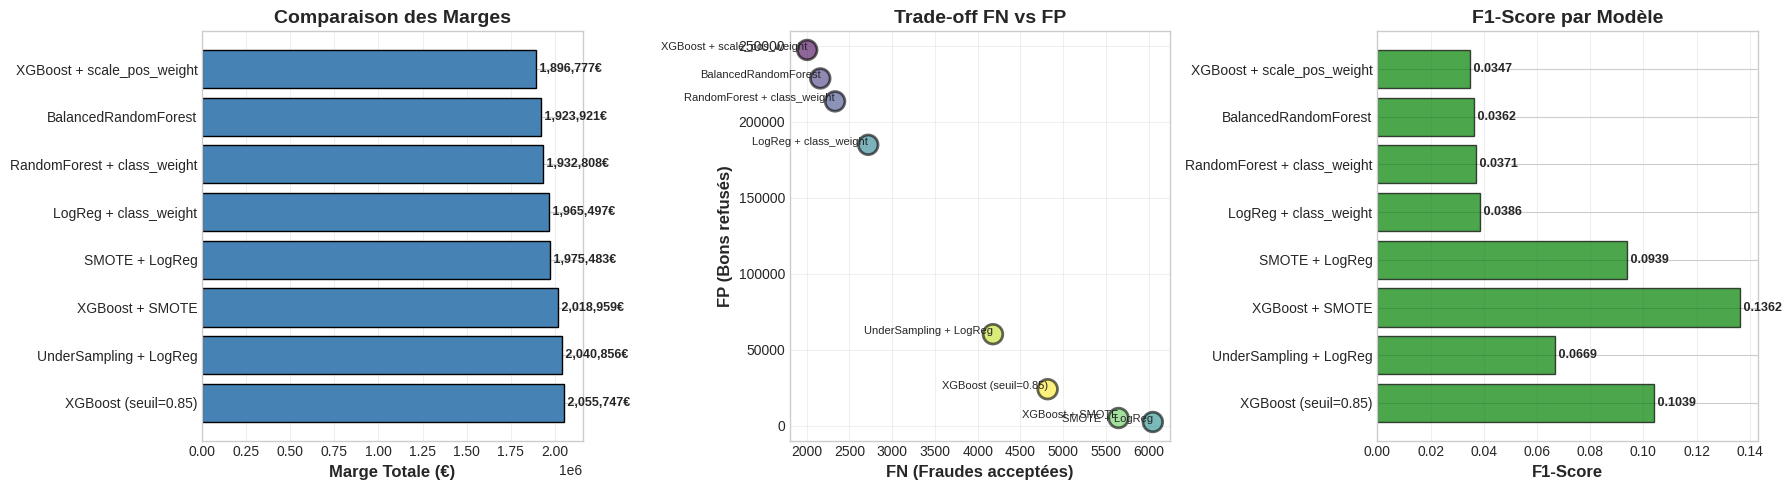


✓ Graphique sauvegardé: comparaison_modeles_marge.png


In [65]:
# Visualisation des résultats
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Graphique 1: Marge totale
axes[0].barh(results_df['modele'], results_df['marge_totale'],
             color='steelblue', edgecolor='black')
axes[0].set_xlabel('Marge Totale (€)', fontsize=12, fontweight='bold')
axes[0].set_title('Comparaison des Marges', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['marge_totale']):
    axes[0].text(v, i, f' {v:,.0f}€', va='center', fontweight='bold', fontsize=9)

# Graphique 2: FN vs FP (Trade-off)
axes[1].scatter(results_df['FN'], results_df['FP'], s=200, alpha=0.6,
                c=results_df['marge_totale'], cmap='viridis',
                edgecolors='black', linewidth=2)
for i, model in enumerate(results_df['modele']):
    axes[1].annotate(model, (results_df.iloc[i]['FN'], results_df.iloc[i]['FP']),
                    fontsize=8, ha='right')
axes[1].set_xlabel('FN (Fraudes acceptées)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('FP (Bons refusés)', fontsize=12, fontweight='bold')
axes[1].set_title('Trade-off FN vs FP', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

# Graphique 3: F1-score
axes[2].barh(results_df['modele'], results_df['f1'],
             color='green', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('F1-Score', fontsize=12, fontweight='bold')
axes[2].set_title('F1-Score par Modèle', fontsize=14, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['f1']):
    axes[2].text(v, i, f' {v:.4f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('comparaison_modeles_marge.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGraphique sauvegardé: comparaison_modeles_marge.png")

In [66]:
print("💾 SAUVEGARDE DES RÉSULTATS")
print("="*80)

# Sauvegarder le tableau de résultats
results_df.to_csv('resultats_maximisation_de_la_marge.csv', index=False)
print("\nresultats_maximisation_de_la_marge.csv")

# Créer un résumé textuel détaillé
with open('resultats_maximisation_de_la_marge.txt', 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("RÉSUMÉ  MAXIMISATION DE LA MARGE\n")
    f.write("="*80 + "\n\n")

    f.write("RÈGLES MÉTIER:\n")
    f.write("  - TN (Accepter bon client):    +5% du montant\n")
    f.write("  - FP (Refuser bon client):     +70% × 5% du montant\n")
    f.write("  - FN (Accepter fraude):        perte selon montant (0-80%)\n")
    f.write("  - TP (Refuser fraude):         0€\n\n")

    f.write("DATASET:\n")
    f.write(f"  Train: {len(y_train):,} transactions\n")
    f.write(f"  Test:  {len(y_test):,} transactions\n")
    f.write(f"  Features: {len(feature_cols)}\n\n")

    f.write("RÉSULTATS PAR MODÈLE (triés par marge):\n")
    f.write("-"*80 + "\n")
    f.write(results_df[['modele', 'marge_totale', 'f1', 'FN', 'FP']].to_string(index=False))

    f.write("\n\n" + "="*80 + "\n")
    f.write(f"🏆 MEILLEUR MODÈLE: {best_model['modele']}\n")
    f.write("="*80 + "\n")
    f.write(f"  Marge totale:  {best_model['marge_totale']:,.2f} €\n")
    f.write(f"  F1-score:      {best_model['f1']:.4f}\n")
    f.write(f"  Précision:     {best_model['precision']:.4f}\n")
    f.write(f"  Rappel:        {best_model['recall']:.4f}\n\n")

    f.write("DÉTAILS FINANCIERS:\n")
    f.write(f"  TN (bons acceptés):       {best_model['TN']:,} → +{best_model['TN_marge']:,.2f} €\n")
    f.write(f"  FP (bons refusés):        {best_model['FP']:,} → +{best_model['FP_marge']:,.2f} €\n")
    f.write(f"  FN (fraudes acceptées):   {best_model['FN']:,} → -{best_model['FN_perte']:,.2f} €\n")
    f.write(f"  TP (fraudes refusées):    {best_model['TP']:,} → 0 €\n\n")

    f.write("INTERPRÉTATION:\n")
    total_gain = best_model['TN_marge'] + best_model['FP_marge']
    f.write(f"  • Gains totaux:  {total_gain:,.2f} €\n")
    f.write(f"  • Pertes totales: {best_model['FN_perte']:,.2f} €\n")
    f.write(f"  • Marge nette:    {best_model['marge_totale']:,.2f} €\n")

print("resultats_maximisation_de_la_marge.txt")

💾 SAUVEGARDE DES RÉSULTATS

resultats_maximisation_de_la_marge.csv
resultats_maximisation_de_la_marge.txt
